# Exploratory Data Analysis (Personal Music Collection Metadata)

### Load The Metadata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

my_music_metadata_df = pd.read_csv("my_music_metadata.csv")
display(my_music_metadata_df)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
0,212,Over Overthinking You,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7438232,183457
1,214,Absolutely Final Goodbye,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6532311,160809
2,216,Make It Work,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9333659,230844
3,218,Get Yourself Together,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8606428,212662
4,220,With Love,Christina Grimmie,With Love,Pop,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9618910,237975
...,...,...,...,...,...,...,...,...,...
874,1962,Anthems for a Seventeen Year Old Girl,Broken Social Scene,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8899716,275670
875,1964,Scott Pilgrim,Plumtree,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,5889314,181968
876,1966,O Katrina!,Black Lips,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,5532348,170840
877,1968,Sleazy Bed Track,The Bluetones,Scott Pilgrim Vs. the World,Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8903857,275800


### Print Out Total File Size Storage And Total Time

In [2]:
total_bytes = my_music_metadata_df['Size'].sum()
total_milliseconds = my_music_metadata_df['Total Time'].sum()

print("Total Bytes: \t", total_bytes)
print("Total Seconds: \t", total_milliseconds)

Total Bytes: 	 6265166905
Total Seconds: 	 175916573


That is about 6.26 gigabytes of data, and its duration is about 2 days.

### Pie Chart For File Types In My Music Collection

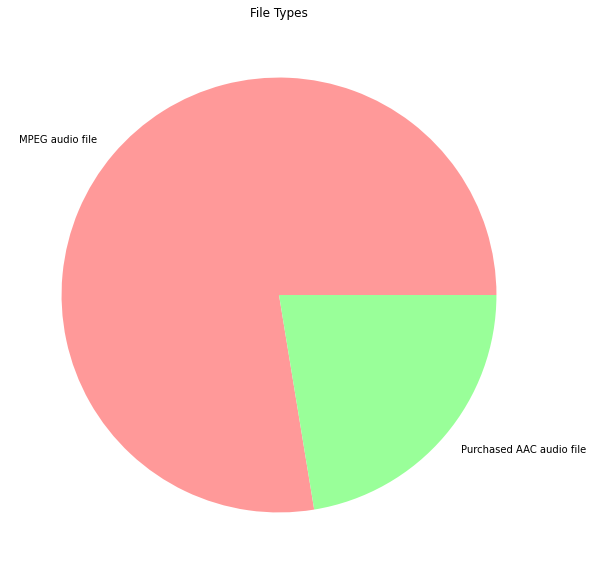

MPEG audio file             682
Purchased AAC audio file    197
Name: Kind, dtype: int64


In [3]:
file_type_counter = my_music_metadata_df['Kind'].value_counts()
file_type_counter.plot(
    kind='pie', 
    figsize=(15,10), 
    colors=['#ff9999','#99ff99'], 
    title='File Types', 
    ylabel=""
)
plt.show()
print(file_type_counter)

### Bar Chart For Music Genres In My Music Collection

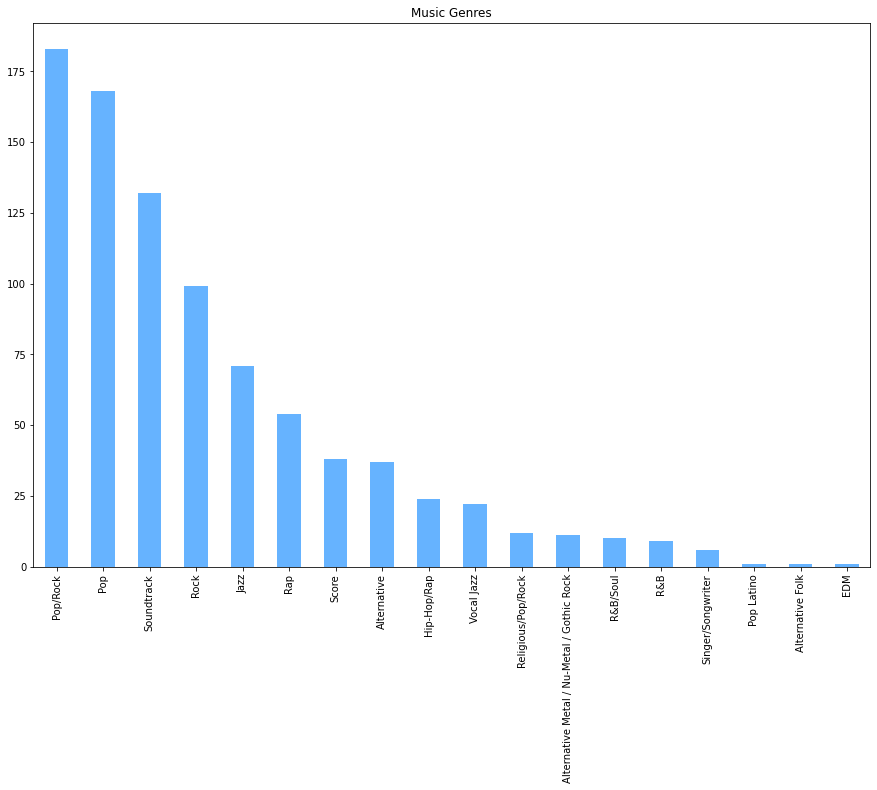

In [4]:
music_genre_counter = my_music_metadata_df['Genre'].value_counts()
music_genre_counter.plot(
    kind='bar', 
    figsize=(15,10), 
    color=['#66b3ff'], 
    title='Music Genres'
)
plt.show()

As you can see on the above bar graph, there are over 18 genres in my personal music collection. To simplify the machine learning process, we need to reclassify each of the songs into one of five genres:
 * Soundtrack
 * Hip Hop
 * Jazz
 * Pop
 * Rock

To do that, lets examine the songs that are do not belong in one of the five categories.

# Data Cleaning

Here is a list of helper methods that aid in the data cleaning process.

In [5]:
#filter tracks by genre
def filter_tracks_by_genre(genre):
    genre_conditional = my_music_metadata_df['Genre'] == genre
    songs_by_genre = my_music_metadata_df[genre_conditional]
    
    return songs_by_genre

#filter tracks by album name
def filter_tracks_by_album(album):
    album_conditional = my_music_metadata_df['Album'] == album
    songs_by_album = my_music_metadata_df[album_conditional]
    
    return songs_by_album

#Once filter tracks by genre, get me the list of albums
def get_albums_by_genre(genre):
    songs_by_genre = filter_tracks_by_genre(genre)
    album_list = list(songs_by_genre['Album'].unique())
    
    return album_list

#Once filter tracks by album, get me the list of artists
def get_artists_by_album(album):
    songs_by_genre = filter_tracks_by_album(album)
    artist_list = list(songs_by_genre['Artist'].unique())
    
    return artist_list

#Once filter tracks by genre, get me a list of albums along with their associated artists
def display_album_artist_by_genre(genre):
    albums = get_albums_by_genre(genre)
    print('List Of Albums Labeled As '+ genre +' Along With Associated Artists: ')
    for album in albums:
        print("**", album)
        artist_list = get_artists_by_album(album)
        for i, artist in enumerate(artist_list):
            print("  ", i + 1, "-", artist)

#Relabel all tracks in the album to its new genre
def relabel_album_genre(album, new_genre):
    album_conditional = my_music_metadata_df['Album'] == album
    my_music_metadata_df.loc[album_conditional, 'Genre'] = new_genre


## Pop Rock

In [6]:
tracks = filter_tracks_by_genre('Pop/Rock')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
356,924,Golden Days,Panic! At the Disco,Death of a Bachelor,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8241681,254432
355,922,LA Devotee,Panic! At the Disco,Death of a Bachelor,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6383335,196649
422,1056,In Between,Linkin Park,Minutes to Midnight,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,4326761,196806
424,1060,The Little Things Give You Away,Linkin Park,Minutes to Midnight,Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9830791,383555


In [7]:
display_album_artist_by_genre("Pop/Rock")

List Of Albums Labeled As Pop/Rock Along With Associated Artists: 
** Back to Basics 
   1 - Christina Aguilera
** American Idiot
   1 - Green Day
** ÷
   1 - Ed Sheeran
** Infinity on High
   1 - Fall Out Boy
   2 - Fall Out Boy & Butch Walker
** Death of a Bachelor
   1 - Panic! At the Disco
** Stripped
   1 - Christina Aguilera
   2 - Christina Aguilera & Lil' Kim
   3 - Christina Aguilera & Larry Gold
   4 - Christina Aguilera & Redman
** Songs About Jane
   1 - Maroon 5
** Absolute Greatest
   1 - Queen
   2 - Queen/David Bowie
   3 - Queen/National Philharmonic Orchestra
** Minutes to Midnight
   1 - Linkin Park
** Mezmerize
   1 - System of a Down
** Hypnotize
   1 - System of a Down
** Intertwined - EP
   1 - dodie
** Folie à Deux
   1 - Fall Out Boy


For the tracks that fall into one of the following albums:
 * Back to Basics
 * ÷
 * Stripped
 * Intertwined - EP,

All tracks that lie in the above albums, they will be labeled as "Pop" music. For the rest of the tracks that are not in the above albums, they will be labeled as "Rock" music.

In [8]:
pop_albums = [
    'Back to Basics ', 
    '÷', 
    'Stripped', 
    'Intertwined - EP'
]

pop_rock_albums = get_albums_by_genre('Pop/Rock')
for album in pop_rock_albums:
    if album in pop_albums:
        relabel_album_genre(album, "Pop")
    else:
        relabel_album_genre(album, "Rock")

## Rap

In [9]:
tracks = filter_tracks_by_genre('Rap')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
810,1834,'97 Bonnie & Clyde,Eminem,The Slim Shady LP,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,12730229,316421
774,1762,Drips,Eminem/Obie Trice,The Eminem Show,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,4612949,285675
806,1826,I'm Shady,Eminem,The Slim Shady LP,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8550628,211931
807,1828,Bad Meets Evil,"Eminem/Royce da 5'9""",The Slim Shady LP,Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,10195302,253048


In [10]:
display_album_artist_by_genre("Rap")

List Of Albums Labeled As Rap Along With Associated Artists: 
** DAMN.
   1 - Kendrick Lamar
   2 - Kendrick Lamar/Rihanna
   3 - Kendrick Lamar/Zacari
   4 - Kendrick Lamar/U2
** The Eminem Show
   1 - Eminem/Obie Trice
   2 - Eminem
   3 - Eminem/Steve Berman
   4 - Eminem/Dina Rae
   5 - Eminem/Dr. Dre
   6 - Eminem/D12
   7 - Paul D. Rosenberg
** The Slim Shady LP
   1 - Eminem
   2 - Eminem/Royce da 5'9"
   3 - Eminem/Aristotle/Marky Bass
   4 - DJ Paul Bunyon
   5 - Eminem/Royce da 5'9"/Jeff Bass
   6 - Eminem/Jeff Bass/Marky Bass
   7 - Jeff Bass
   8 - Winkler/Zoe


Most music from the above list are from the rapper Eminem, and he is considered as a rapper. Based on the music genre taxamony, rap music is a sub-genre of hip hop. Therefore, all rap music will be labeled as "Hip-Hop" music. (see Musical_Genre_Taxonomy.png)

In [11]:
relabel_album_genre("DAMN.", "Hip-Hop")
relabel_album_genre("The Eminem Show", "Hip-Hop")
relabel_album_genre("The Slim Shady LP", "Hip-Hop")

## Score

In [12]:
tracks = filter_tracks_by_genre('Score')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
726,1666,Main Title,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,4942682,109923
738,1690,Training With Mr. Schaibel,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7918604,184320
725,1664,Turning Point,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,5584258,125962
742,1698,Moscow Invitational 1968,Carlos Rafael Rivera,The Queen's Gambit (Music from the Netflix Lim...,Score,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,18438650,447320


In [13]:
display_album_artist_by_genre("Score")

List Of Albums Labeled As Score Along With Associated Artists: 
** The Queen's Gambit (Music from the Netflix Limited Series)
   1 - Carlos Rafael Rivera


Since the above album is the original soundtrack from the hit show "The Queen's Gambit", all tracks that belong to the ablum will be labeled as "Soundtrack" music.

In [14]:
relabel_album_genre("The Queen's Gambit (Music from the Netflix Limited Series)", "Soundtrack")

## Alternative

In [15]:
tracks = filter_tracks_by_genre('Alternative')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
801,1816,Crushcrushcrush,Paramore,Riot! (Deluxe Version),Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8202084,189518
579,1372,Say Amen (Saturday Night),Panic! At the Disco,Pray For the Wicked,Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6782470,189269
642,1498,!!!!!!!,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,661660,13635
804,1822,"For a Pessimist, I'm Pretty Optimistic",Paramore,Riot! (Deluxe Version),Alternative,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9759028,228440


In [16]:
display_album_artist_by_genre("Alternative")

List Of Albums Labeled As Alternative Along With Associated Artists: 
** Pray For the Wicked
   1 - Panic! At the Disco
** Pray For The Wicked
   1 - Panic! At the Disco
** WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?
   1 - Billie Eilish
** Riot! (Deluxe Version)
   1 - Paramore


Notice that there are two albums with the same name but they are spelled differently, one is "Pray For the Wicked" with a lowercase t, and the other is "Pray For The Wicked" with an uppercase t. They are the same album, so all track music in the "Pray For The Wicked" ablum will be labeled as "Rock". All songs in the Billie Eilish album "WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?" will be labeled as "Pop" music, and All songs in the "Riot!" album will be labeled as "Rock" music.

In [17]:
relabel_album_genre("Pray For the Wicked", "Rock")
relabel_album_genre("Pray For The Wicked", "Rock")
relabel_album_genre("WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?", "Pop")
relabel_album_genre("Riot! (Deluxe Version)", "Rock")

## Hip-Hop / Rap

In [18]:
tracks = filter_tracks_by_genre('Hip-Hop/Rap')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
281,774,Kill You,Eminem,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,9294100,264786
282,776,Shit On You,Eminem & D12,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,11345194,328213
280,772,Role Model,Eminem,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7307510,205280
263,738,Fack,Eminem,Curtain Call - The Hits (Deluxe Version),Hip-Hop/Rap,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7299828,205760


In [19]:
display_album_artist_by_genre("Hip-Hop/Rap")

List Of Albums Labeled As Hip-Hop/Rap Along With Associated Artists: 
** Curtain Call - The Hits (Deluxe Version)
   1 - Eminem
   2 - Eminem & Dido
   3 - Eminem & Dr. Dre
   4 - Eminem & Elton John
   5 - Eminem & The Notorious B.I.G.
   6 - Eminem & D12
   7 - Eminem & JAY Z


Similar to the Rap section of this notebook, all tracks in the "Curtain Call - The Hits" album will be labeled as "Hip-Hop" music.

In [20]:
relabel_album_genre("Curtain Call - The Hits (Deluxe Version)", "Hip-Hop")

## Vocal Jazz

In [21]:
tracks = filter_tracks_by_genre("Vocal Jazz")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
292,796,The Girl from Ipanema (With Antonio Carlos Jobim),Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7784010,194040
298,808,My Kind of Town,Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7620231,191213
306,824,"Theme from New York, New York",Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,8234577,204906
290,792,Bewitched,Frank Sinatra,Nothing But the Best - The Frank Sinatra Colle...,Vocal Jazz,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7108395,179906


In [22]:
display_album_artist_by_genre("Vocal Jazz")

List Of Albums Labeled As Vocal Jazz Along With Associated Artists: 
** Nothing But the Best - The Frank Sinatra Collection (Remastered)
   1 - Frank Sinatra


Frank Sinatra is considered one of the most influential musicians in the 20th Century, and we can regard him as a Jazz musician. Because of this, all tracks in the "Nothing But the Best - The Frank Sinatra Collection" will be labeled as "Jazz" music.

In [23]:
relabel_album_genre("Nothing But the Best - The Frank Sinatra Collection (Remastered)", "Jazz")

## Religious / Pop / Rock

In [24]:
tracks = filter_tracks_by_genre('Religious/Pop/Rock')
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
500,1212,I Could Be the One,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8757214,218122
499,1210,Strong Enough,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9492884,236512
502,1216,Tight,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6019290,149681
492,1196,Stuck,Stacie Orrico,Stacie Orrico,Religious/Pop/Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8898263,221648


In [25]:
display_album_artist_by_genre("Religious/Pop/Rock")

List Of Albums Labeled As Religious/Pop/Rock Along With Associated Artists: 
** Stacie Orrico
   1 - Stacie Orrico


Stacie Orrico is considered as a pop musician. Because of this, all tracks in the "Stacie Orrico" album, will be labeled as "Pop" music.

In [26]:
relabel_album_genre("Stacie Orrico", "Pop")

## Alternative Metal / Nu-Metal / Gothic Rock

In [27]:
tracks = filter_tracks_by_genre("Alternative Metal / Nu-Metal / Gothic Rock")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
845,1904,Hello,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,9056518,221570
844,1902,Haunted,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7719051,188133
842,1898,Imaginary,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,10497436,257593
849,1912,Whisper,Evanescence,Fallen,Alternative Metal / Nu-Metal / Gothic Rock,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,13298807,327627


In [28]:
display_album_artist_by_genre("Alternative Metal / Nu-Metal / Gothic Rock")

List Of Albums Labeled As Alternative Metal / Nu-Metal / Gothic Rock Along With Associated Artists: 
** Fallen
   1 - Evanescence


Metal is sub-genre of Rock so because of this all songs in the Fallen album are labeled as rock. 

In [29]:
relabel_album_genre("Fallen", "Rock")

## R & B / Soul

In [30]:
tracks = filter_tracks_by_genre("R&B/Soul")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
326,864,Perfect,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7776213,215849
330,872,Rotate,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6530737,180845
331,874,Every Night,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,7401781,206733
332,876,The Real You,Jake Barker & Blended Babies,Trip,R&B/Soul,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6797913,188368


In [31]:
display_album_artist_by_genre("R&B/Soul")

List Of Albums Labeled As R&B/Soul Along With Associated Artists: 
** Trip
   1 - Jake Barker & Blended Babies


R & B is a sub genre of Hip-Hop (see Musical_Genre_Taxonomy.png), so all songs in the "Trip" Album will be labeled as "Hip-Hop" music.

In [32]:
relabel_album_genre("Trip", "Hip-Hop")

## R & B 

In [33]:
tracks = filter_tracks_by_genre("R&B")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
219,650,24K Magic,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,6994468,226951
223,658,Versace on the Floor,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7963481,261276
225,662,Calling All My Lovelies,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7832436,250122
227,666,Too Good to Say Goodbye,Bruno Mars,24K Magic,R&B,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,8630721,281861


In [34]:
display_album_artist_by_genre("R&B")

List Of Albums Labeled As R&B Along With Associated Artists: 
** 24K Magic
   1 - Bruno Mars


Similar to the previous section, all R&B music will be labeled as "Hip-Hop".

In [35]:
relabel_album_genre("24K Magic", "Hip-Hop")

All the other genres below will be labeled as "Pop" music.

## Singer / Songwriter

In [36]:
tracks = filter_tracks_by_genre("Singer/Songwriter")
tracks.sample(4)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
562,1338,Instrumental,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,2197111,50340
561,1336,6/10,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6474218,185487
563,1340,In the Middle,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6494192,181632
565,1344,You,dodie,You - EP,Singer/Songwriter,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,6128776,170975


In [37]:
display_album_artist_by_genre("Singer/Songwriter")

List Of Albums Labeled As Singer/Songwriter Along With Associated Artists: 
** You - EP
   1 - dodie


In [38]:
relabel_album_genre("You - EP", "Pop")

## Alternative Folk

In [39]:
tracks = filter_tracks_by_genre("Alternative Folk")
display(tracks)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
621,1456,Here Comes The Sun (feat. dodie),Jacob Collier,Here Comes The Sun (feat. dodie) - Single,Alternative Folk,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,9766618,238360


In [40]:
display_album_artist_by_genre("Alternative Folk")

List Of Albums Labeled As Alternative Folk Along With Associated Artists: 
** Here Comes The Sun (feat. dodie) - Single
   1 - Jacob Collier


In [41]:
relabel_album_genre("Here Comes The Sun (feat. dodie) - Single", "Jazz")

## Pop Latino

In [42]:
tracks = filter_tracks_by_genre("Pop Latino")
display(tracks)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
392,996,Despacito (feat. Daddy Yankee),Luis Fonsi,Despacito (feat. Daddy Yankee) - Single,Pop Latino,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,Purchased AAC audio file,8604342,227791


In [43]:
display_album_artist_by_genre("Pop Latino")

List Of Albums Labeled As Pop Latino Along With Associated Artists: 
** Despacito (feat. Daddy Yankee) - Single
   1 - Luis Fonsi


In [44]:
relabel_album_genre("Despacito (feat. Daddy Yankee) - Single", "Pop")

## EDM

In [45]:
tracks = filter_tracks_by_genre("EDM")
display(tracks)

,Track ID,Name,Artist,Album,Genre,Location,Kind,Size,Total Time
464,1140,Stay With Me,Diamond Eyes & Christina Grimmie,Stay With Me - Single,EDM,file:///Users/AlwynLopez/Music/iTunes/iTunes%2...,MPEG audio file,7370843,243800


There is only one track that has the genre 'EDM' so to make things simple, let us relabel it as "Pop".

In [46]:
display_album_artist_by_genre("EDM")

List Of Albums Labeled As EDM Along With Associated Artists: 
** Stay With Me - Single
   1 - Diamond Eyes & Christina Grimmie


In [47]:
relabel_album_genre("Stay With Me - Single", "Pop")

# Genre Distribution (Post - Reclassification)

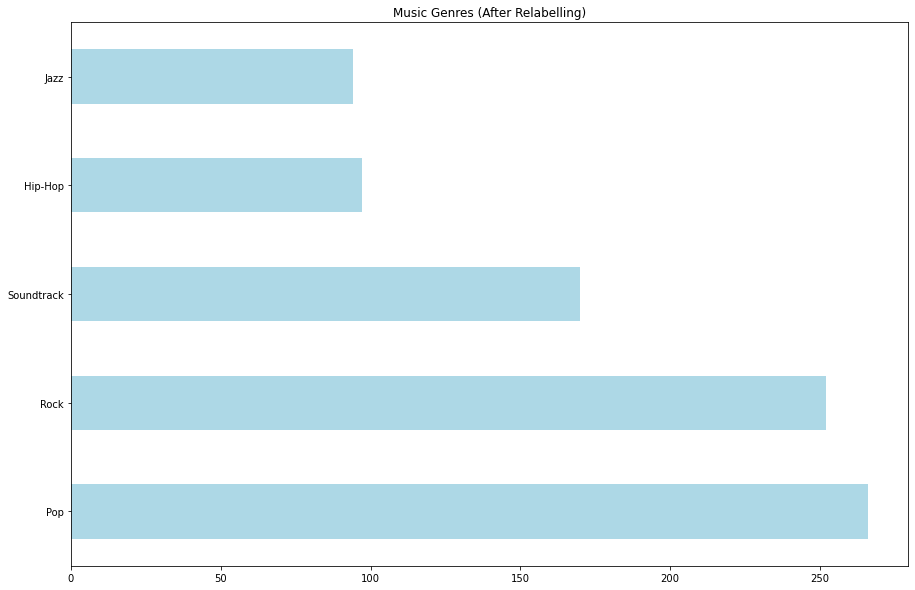

Pop           266
Rock          252
Soundtrack    170
Hip-Hop        97
Jazz           94
Name: Genre, dtype: int64

In [48]:
music_genre_counter = my_music_metadata_df['Genre'].value_counts()
music_genre_counter.plot(
    kind='barh', 
    figsize=(15,10), 
    color='lightblue', 
    title='Music Genres (After Relabelling)'
)
plt.show()
my_music_metadata_df.Genre.value_counts()

As you can see from the above graph, as well as the genre tally table, there is an imbalanced dataset where most music falls into one of three categories "Pop", "Rock", and "Soundtrack", while the rest falls into "Hip-Hop" or "Jazz". This would be a problem if we want to create a machine learning or deep learning model that can classify the five genres accurately.

To resolve this issue, we will use upsampling techniques so that the number of tracks in each of the five genres are roughly the same (around ~500 samples each). For details how the upsampling process works, see the python script load_my_music.py script.


In [49]:
my_music_metadata_df.to_csv("my_music_metadata_(m).csv", index=False)